<a href="https://colab.research.google.com/github/malikkotb/Seminar_SS23/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with a Convolutional Neural Network

This step-by-step guide through building a Convolutional Neural Network for Image Classification assumes you have already successfully managed to install PyTorch on your computer and were able to create a new Jupyter Notebook to start coding.

The following code is mainly from these sources:
*   https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48
* https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-data
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://medium.com/bitgrit-data-science-publication/building-an-image-classification-model-with-pytorch-from-scratch-f10452073212
* https://pytorch.org/vision/stable/index.html

## Imports

These are imports that we will be needing and using throughout the process of building our entire network.

In [2]:
# The below imports can be found on https://pytorch.org/docs/
import torch
import torch.nn as nn # for defining a neural network
import torch.nn.functional as F # for importing activation functions like ReLu
from torch.utils.data import DataLoader # for
from torchvision import datasets, transforms, models # for performing transformations on the images
from torchvision.utils import make_grid # to view a batch of images
import os # https://docs.python.org/3/library/os.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# So we can ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Preprocessing starts here

## Load the dataset

In this section we will load in the dataset. In this project I have chosen the "Animal Faces" dataset from https://www.kaggle.com/datasets/andrewmvd/animal-faces?resource=download

You can go ahead and **download the dataset from the provided url**.

After downloading the dataset you should upload zipped images folder from your system into Google Colab.
Steps:
1. Download dataset from kaggle. You will receive a zipped file called: "archive.zip".
2. Unzip this file.
2. Upload the unzipped folder: "afhq" to Google Drive.
4. Use the following commands to mount google drive.
5. Then extract files to the local environment with the `!unzip` command

Source: https://www.aboutdatablog.com/post/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here we unzip the files:

In [4]:
!unzip gdrive/MyDrive/Seminar\ Data/archive.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: af

#### Structure of our files
The image files are stored in a main folder called "afhq" and inside that folder there will be two more folders: "train" and "val" for training and validation (aka testing). Each of these folders are subdivided into 3 further folders for the 3 different classes that we have in this dataset: "cat", "dog", and "wild". The "wild" folder contain the images with the wildlife animals.


## Explore the dataset


View an image from our dataset.

In [5]:
from PIL import Image
from IPython.display import display

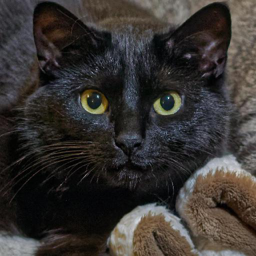

In [6]:
# All images have a prefix of "flickr" or "pixabay", then the corresponding
# class name (cat, dog, wild) and a number, .. .jpg
with Image.open('/content/afhq/train/cat/flickr_cat_000032.jpg') as im:
  resized_image = im.resize((256,256))  # Resize the image
  display(resized_image)


In [7]:
import random

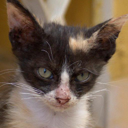

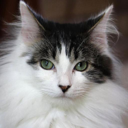

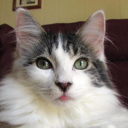

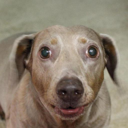

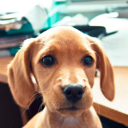

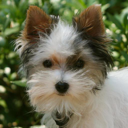

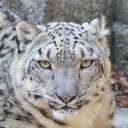

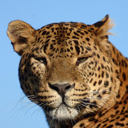

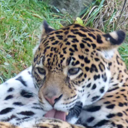

In [8]:
from PIL import Image
from IPython.display import display

# Define the prefix, class names, and the range of numbers for the images
prefixes = ["flickr", "pixabay"]
class_names = ["cat", "dog", "wild"]
num_images_per_class = 3
image_size = (128, 128)  # size for displayed images

random.seed(42)
random_number = random.randint(1, 500)

# Iterate over the class names
for class_name in class_names:
    # Iterate over the prefixes
    # for prefix in prefixes:
        # Iterate over the range of numbers for the images
        # the images start with the number/index: 2 -> so the first image in train/cat is: 000002
        for number in range(random_number, num_images_per_class + random_number):
            image_path = f"/content/afhq/train/{class_name}/{prefixes[0]}_{class_name}_{number:06d}.jpg"
            try:
                with Image.open(image_path) as im:
                    resized_image = im.resize(image_size)  # Resize the image
                    display(resized_image)
            except FileNotFoundError:
                print(f"File not found: {image_path}")
                continue




Luckily the images in this dataset are all the same size (512x512).
Furthermore, as we can see from the randomly displayed images above, all of the images are already cropped to round about the center of the head of each individual animal. Making a further transformation of the images such as center-cropping not necessary.

## Common practice steps in preprocessing

It is a common practice to perform the following preprocessing steps:

1. Resize all the images to the same size. Most of the deep learning architectures expect the images to be of the same size. -> Our images are already all the same size.
2. Normalize the dataset with the mean and standard deviation of the dataset. -> We will do this with the mean and std of the ImageNet dataset.
3. Convert the image dataset to a PyTorch tensor.

Source:
* https://learning.oreilly.com/library/view/deep-learning-with/9781788624336/06de82d7-fb22-4b43-9149-1ea6c3fd7769.xhtml (Book: Deep Learning with PyTorch)

## Define our transforms

In [9]:
# TODO: put the section on Data Augmentation in the paper not the notebook


Data augmentation for image classification refers to the technique of applying various transformations to existing data samples to create additional training examples. The goal is to increase the diversity and variability of the training data, which can help improve the performance and generalisation of machine learning models. Here are some examples of data augmentation techniques commonly used in computer vision tasks:

* Geometric transformations: randomly flip, crop, rotate, stretch, and zoom images. You need to be careful about applying multiple transformations on the same images, as this can reduce model performance.
* Color space transformations: randomly change RGB color channels, contrast, and brightness.
* Kernel filters: randomly change the sharpness or blurring of the image.
* Random erasing: delete some part of the initial image.
Mixing images: blending and mixing multiple images

Sources:
* https://en.wikipedia.org/wiki/Data_augmentation
* https://www.datacamp.com/tutorial/complete-guide-data-augmentation

An affine transformation is one that preserves points and straight lines. Examples include rotation, reflection, and scaling. For instance, we can double the effective size of our training set simply by flipping the images.

Source:
* https://en.wikipedia.org/wiki/Affine_transformation

What's nice about this random horizontal flip is that since we'll be performing some of these transformations right before we feed in a batch into our network. It's sometimes nice to perform these transformations on a random basis. That way we don't have maybe all the horizontal flips to the left being fed in first and then all the horizontal flips to the right being fed in first.
Instead we randomly either rotate or randomly flip images and we can provide a probability of it being rotated or transformed.

In this section we will perform image preprocessing and image transformations to make our images suitable for training.

Data Augmentation: quick explanation (source angeben)

Transformations (rotation, flipping etc.) are used for data augmentation.

Normalization

Once the image has been loaded into a tensor, we can perform normalization on it. This serves to make convergence happen quicker during training. The values are somewhat arbitrary - you can use a mean of 0.5 and a standard deviation of 0.5 to convert a range of [0,1] to [-1,1], for example.<br>However, <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>research has shown</a> that mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] work well in practice.

<a href='https://pytorch.org/vision/stable/generated/torchvision.transforms.Normalize.html'><tt>transforms.Normalize(<em>mean, std</em>)</tt></a>

Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input tensor.

Normalize a tensor image with mean and standard deviation. This transform does not support PIL Image. Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]

[Above paragraph is copied from 1st source -> cite]

Sources:
* https://pytorch.org/vision/stable/generated/torchvision.transforms.Normalize.html
* https://en.wikipedia.org/wiki/Normalization_(image_processing)
* Using the mean and std of Imagenet: https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2

In [10]:
# TODO: in paper:
# sources, unter anderem: https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/
# explain each transformation
# why do we resize
# why do we flip, rotate (for data augmentation)
# If we centerCrop, why do we do that
# why do we transform totensor() ?
# why do we normalise

# Why do we not add Rotation and flipping transformations to test set.

When an image is transformed into a PyTorch tensor, the pixel values are scaled between 0.0 and 1.0. In PyTorch, this transformation can be done using torchvision.transforms.ToTensor().

The <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>recommended normalization parameters</a> for mean and std per channel.

Source:
* https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/

In [11]:
# TODO: remove the transformation:
# transforms.Resize(128) (which is a quarter of the size of the original images) for train_transform AND test_transform
# and add transforms.Resize(256) # half the image size, and see how the model performs
# and remove the transform completely
# -> to see how the model performs on the images with their original sizes
# this will of course slow down training iterations

# and perhaps use 224 as dimensions (these dimensions are often used in CIFAR-10 dataset)

In [12]:
# TRAIN TRANSFORMS
# Compose() to perform a variety of transformations
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(p=0.5),  # reverse 50% of images
        transforms.Resize(128),             # resize to 128x128
        # resizing to a smaller dimension can speed up training iterations
        transforms.ToTensor(), # ToTensor()
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]) # ImageNet normalisation params
    ])



In [13]:
# TEST TRANSFORMS
# For the test set, we don't want to randomly rotate and randomly
# flip these images. Because we're really just using those transforms
# to test out the capability of the network to predict on a
# new real image of a dog or a cat or a wildlife animal.
# And the real images in the dataset, those aren't randomly rotated/flipped.

# But images in test set need to be in the same dimensions that the network was trained on.
# and be normalised, so that they are in the same value range that the network was trained on

test_transform = transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

## Preparing our train and test sets

Here we will load and split our data into training and test set and prepare the Batches using the DataLoader objects.

PyTorch offers the convenient ImageFolder class (a built-in torchvision dataset tool), which simplifies dataset preparation for such a structure. By providing the data directory as input, we can easily create a dataset that is ready for training our model.
For this to work, however, the files have to be in a certain directory structure. Main_Folder/train/class_name1; class_name2 etc.

[Source: https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48 ]

The DataLoader makes it easy to load and group data into the individual batches from a dataset.

Source:
* https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [15]:
# Load data using ImageFolder
path = '/content/afhq'

train_data = datasets.ImageFolder(os.path.join(path, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(path, 'val'), transform=test_transform)




In [17]:
# Our class names / the labels in our dataset
class_names = train_data.classes # our labels
print(class_names)

['cat', 'dog', 'wild']


In [18]:
# Look at first entry in train dataset
image, label = train_data[0]
print(image.shape, label)

torch.Size([3, 128, 128]) 0


So our first image in the dataset has a shape (3,128,128).

Which means the image has 3 channels (RGB), height: 150, and width: 150.

The image has a label 0, which represents the "cat" class.

In [19]:
print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['cat', 'dog', 'wild']
Training images available: 14630
Testing images available:  1500


Those aren't that many images for training/testing. But we need to keep in mind, that we have this list of transformations (Data Augmentation) we can perform on this data.

So essentially, as we're feeding in these randomly transformed batches during training, we're not only just showing the same 14630 available images every time; we're showing randomized rotations or flippings of them.

Choosing the batch size:

The batch size determines how many samples are processed together before updating the model's parameters.

The batch size affects some indicators such as overall training time, training time per epoch, quality of the model, and similar. Usually, we chose the batch size as a power of two, in the range between 16 and 512. But generally, the size of 32 is a rule of thumb and a good initial choice. Source: https://www.baeldung.com/cs/learning-rate-batch-size#:~:text=The%20batch%20size%20affects%20some,and%20a%20good%20initial%20choice.


**Batch size is a hyper parameter like e.g. learning rate.**

In our training dataset we have 14630 images. We will start by choosing a batch-size of 32. This means that the first 14624 images will be evenly divided into batches of 32 images each. So we will have 457 complete batches. The remaining 6 images (14630 - 14624) will form the last batch.

During training, the model will process the complete batches with the specified batch size, and in the last batch, it will process the remaining images, even if the batch size is smaller.

Source:
* https://stackoverflow.com/questions/60142351/optimal-batch-size-for-image-classification-using-deep-learning

By creating the train_loader object, we get an iterable that can be used to iterate over the training dataset in batches. Each iteration will provide a batch of samples with the specified batch size, and the order of the samples will be randomly shuffled if shuffle=True. This train_loader can be used in the training loop to feed the batches of data to the model for training.


By setting `shuffle=True` on the training dataset, we indicate that the data should be shuffled before each epoch (a complete pass through the dataset). When set to True, the DataLoader will randomly shuffle the samples within each epoch, ensuring that the model sees the data in different orderings during training, which can help prevent the model from being biased by the order of the data.

Source:
* https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

By creating the test_loader object, we get an iterable that allows us to iterate over the test dataset in batches. Each iteration (like with the train_loader object) will provide a batch of samples with the specified batch size (32). The order of the samples will be preserved, as shuffle is set to False.


In [20]:
# Preparing the batches and shuffle

torch.manual_seed(67) # seed for shuffling
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
# do shuffle on training data
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
# don't shuffle on test data

## Display a single batch of images

We will display a batch of images, to make sure (to verify) that the training laoder selects "wild", "cat", and "dog" images at random.

 So we want it to be trained on cats, dogs, and wildlife simultaneaously so we can not learn all cats first and then all dogs and then all wildlife animals. Otherwise, it won't lead to a generalized model and would perform poorly.

So we need to make sure that it's feeding in both cats, dogs and wildlife animals kind of randomly at the same time, and that we are performing those random transformations, such as flipping horizontally or rotation.

Of course, we won't be able to tell if an image has been flipped horizontally as we don't know what all the available images in the training data look like.

Random rotations will be visible though, they will have little black edges around the images.

In [21]:
# Grab the first batch of 32 images
for images,labels in train_loader:
    # we break immediately to only get the first batch
    break


In [22]:
images.shape

torch.Size([32, 3, 128, 128])

32 images, 3 color channels (R,G,B) where each channel is 128by128 (because of the transformations we did above in *resizing*)

Label: [1 0 0 2 0 1 1 2 0 1 2 2 1 0 1 1 1 0 2 1 1 2 0 0 1 0 2 0 1 0 2 0]
Class: dog cat cat wild cat dog dog wild cat dog wild wild dog cat dog dog dog cat wild dog dog wild cat cat dog cat wild cat dog cat wild cat


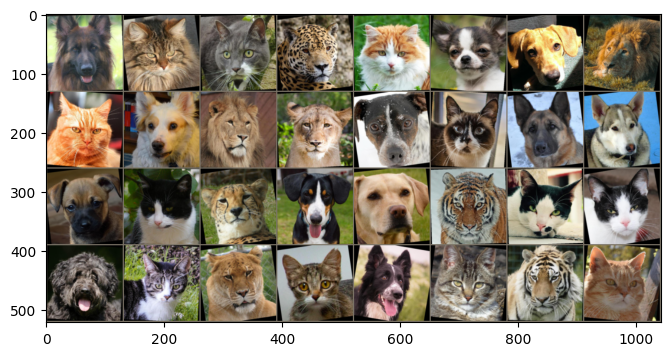

In [23]:
# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=8) # make a grid of images (from pytorch torchvision)

# We normalized the images in the transformations, so
# we will need to inverse the normalisation to view the images

# Inverse normalize the images
# code taken from: https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4)) # make the displayed images a little smaller
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));
# np.transpose(..) -> we have to transpose the axes in order to
# get the color channel to the correct dimension that matplotlib expects


We can see our batches are shuffled, as we get random images of dogs, cats, and wildlife animals.

And we can also see that some of the images are randomly rotated and some may be horizontally flipped.

But again, we can't see horizontal flippings as we haven't seen all the original images in the dataset.

## Preprocessing done

## Define our Convoluional Neural Network model

##  Define a Loss function and optimizer


## Train the model on the training data.

## Save the trained model

## Evaluate the performance of the model